<a href="https://colab.research.google.com/github/p82maavd/Metaheuristicas/blob/main/Practica2Metaheuristica_Codificacion_Entera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [2]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np


Evaluacion de la solucion

In [3]:
def evaluarSolucion(solucion, precios, pesos, pesoMax):
    precio = 0
    peso = 0
    for i in range(len(solucion)):
        precio += precios[i]*solucion[i]
        peso += pesos[i]*solucion[i]

    if peso > pesoMax:
        return 0
    else:
        return precio


Función de torneo

In [4]:
def torneo(poblacion,k):

    index_candidatos = []
    candidatos = []
    

    for i in range(k):

        index = random.randint(1,len(poblacion)-1)

        candidatos.append(poblacion[index][1])
        index_candidatos.append(index)

    mejor = max(candidatos)
    pos = candidatos.index(mejor)

    return poblacion[[index_candidatos[pos]][0]]


Funciones de cruce y mutación

In [5]:
def cruce(p1,p2):
  #cruce one-cut
    s1 = []
    s2 = []

    rn = random.randint(1,len(p1[0])-1)

    for i in range(len(p1[0])):

        if i < rn:
            s1.append(p1[0][i]) 
            s2.append(p2[0][i]) 
        else:
            s1.append(p2[0][i]) 
            s2.append(p1[0][i])

#   print("padre 1: ", p1, " hijo 1: ",s1," padre 2: ",p2," hijo 2: ",s2," particion",rn)
    return s1, s2


def mutar(m1): #Enteros(m1):
        
    rn = random.randint(0,len(m1)-1)
    
    mutacion = random.randint(0,1)
    
    if mutacion == 0:
      mutacion = -1

    if m1[rn] == 0 and mutacion == -1:
      mutacion = 1    

    m1[rn]+=mutacion
    
    return m1


Función aplicar operadores

In [6]:
def aplicarOperadoresGeneticos(poblacion, k, cProb, mProb):

    npoblacion = []

    while len(npoblacion) != len(poblacion):
    
        s = [0,0]

        #Seleccionar padres mediante torneo tamaño k
        padrea = torneo(poblacion,k); 
        padreb = torneo(poblacion,k);
 
        #Cruzar padres con probabilidad cProb
        if random.randint(1,100) <= cProb*100:
            s[0], s[1] = cruce(padrea,padreb)
        else:
            s[0] , s[1] = padrea[0], padreb[0]


        #Mutar padres con probabilidad mProb
        for i in range(0,2):
          if random.randint(1,100) <= mProb*100:
            s[i] = mutar(s[i])
         
         #añadir los hijos a la nnueva poblacion
        for i in range(0,2):
            if len(npoblacion) < len(poblacion):
                npoblacion.append([s[i],-1])

    return npoblacion #Devolver la nueva poblacion (sin evaluar)


Generador aleatorio

In [7]:
def generador(size, min, max):
    listElements = []
    for i in range(size):
        
        listElements.append(random.randint(min, max))
        
    return listElements



Calcular media de generacion

In [8]:
def mediaGen(pob):
  sum = 0

  for i in range(0,len(pob)-1):
    sum = sum + pob[i][1]


  return sum / len(pob)

Funcion para generacion inicial

In [9]:
def solucion_inicial(pesoMax,pesos,precios,l,numeroSoluciones):
        poblacion = []
    
        for i in range(numeroSoluciones):
            objetos = list(range(l))
            sol2 = []
            sol = []
            s = [0]*len(pesos)
            peso = 0

            while peso < pesoMax:
                objeto = objetos[random.randint(0, len(objetos) - 1)]
                cantidad = random.randint(0, 3)
                peso += pesos[objeto]*cantidad
                if peso <= pesoMax:

                    
                    s[objeto]=cantidad
                    objetos.remove(objeto)
               


                if len(objetos)==0:
                  break
            poblacion.append([s,evaluarSolucion(s,precios,pesos,pesoMax)])
        return poblacion


¿Cómo se comporta este algoritmo a medida que cambiamos el número de
soluciones, generaciones, tamaño del torneo, probabilidad de cruce y probabilidad
de mutación? Amplía el problema con más objetos para ver el comportamiento
del algoritmo.


Cambiando numero de soluciones

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
[[3133.615, 4007.6099999999997, 4138.370000000001, 4329.754999999999, 4630.995000000001, 4579.425, 4655.12, 4318.27, 4545.365, 4444.12, 4715.469999999999, 4289.4, 4366.130000000001, 4681.945000000001, 4563.570000000001, 4752.380000000001, 4745.13, 4555.245000000001, 4443.045, 4876.01, 4583.750000000001, 4393.6050000000005, 4720.525, 4462.39, 4595.42, 4352.210000000001, 4326.070000000001, 4552.115, 4728.500000000001, 4807.12, 4769.35, 4702.395, 4656.935000000001, 4803.740000000001, 4301.0599999999995, 4329.33, 4552.41, 4715.53, 4386.885, 4412.665, 4534.1, 4717.615, 4859.424999999999, 4676.635, 4817.500000000001, 4611.175000000001, 4934.1, 4749.795, 4997.0650000000005, 4804.324999999999, 4799.27, 4752.58, 4673.675, 4531.0599999999995, 4553.29, 4664.535000000001, 4742.380000000001, 4612.475, 4682.640000000001, 4798.560000000001, 4803.76, 4803.805, 4353.505, 4543.2699999999995, 4898.280000000001, 4754.675, 4860.335000000001, 4700.

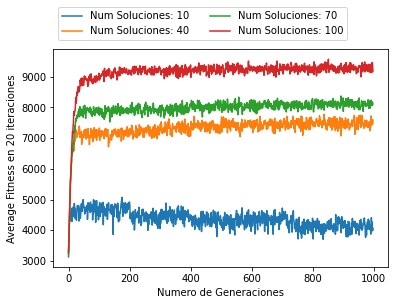

[0.0, 5280.349999999999, 6604.299999999999, 7464.949999999999, 7424.4000000000015, 7544.35, 7863.05, 8699.05, 8320.250000000002, 8858.35, 9173.800000000001, 9252.35, 9546.7, 9312.249999999998, 9560.95, 9805.0, 9818.600000000002, 10155.45, 10068.400000000001, 10603.1]


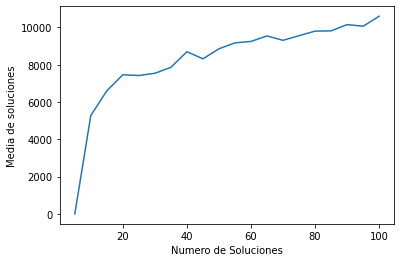

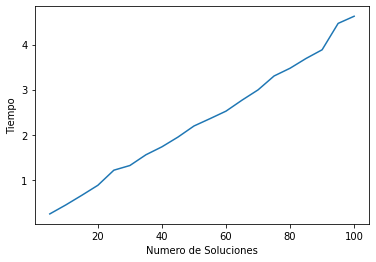

In [ ]:
#codigo cambiando numero de soluciones

def main():


    pesos = generador(100,20,100)
    precios = generador(100,50,500)

    pesoMax = 1000 #Peso máximo que se puede poner en la mochila
    numeroSoluciones = 25 #Tamaño de la poblacion
    maxGeneraciones = 1000 #Numero de generaciones
    k = 3 #Tamaño torneo selector de padres
    cProb = 0.7 #Probabilidad de cruce
    mProb = 0.1 #Probabilidad de mutacion
    tiempoList = []
    solucionList = [] 
    vectormedias=[]
    tam = range(5,101,5)
    for numeroSoluciones in tam:

      print(numeroSoluciones)
      #k = 3
      mediatiempo = 0
      mediasolucion = 0
      mediasgen=[0]*(maxGeneraciones-1)
      numIt=20
      for j in range(0,numIt):

        tini=time.time() #iniciar temporizador
        l=len(pesos)

        ##Creamos n soluciones aleatorias que sean válidas
        poblacion = solucion_inicial(pesoMax,pesos,precios,l,numeroSoluciones)
        #fin generacion aleatoria

        it=1

        while it < maxGeneraciones:
            nSoluciones = aplicarOperadoresGeneticos(poblacion,k,cProb,mProb)
            #Modelo generacional
            
            poblacion = []
            
            best_solucion_por_generacion=[0,0]
            eval = 0

            for solucion in nSoluciones:
                eval=evaluarSolucion(solucion[0],precios,pesos,pesoMax)
            
                if eval > best_solucion_por_generacion[1]:
                  best_solucion_por_generacion[0]=solucion[0]
                  best_solucion_por_generacion[1]=eval
                poblacion.append([solucion[0],eval])
                

            if numeroSoluciones % 30 == 10:
              mediasgen[it-1]+=mediaGen(poblacion)
            it+=1
            
        tfi=time.time()

        tiempo=tfi-tini

#calcular medias de cada ejecución
        mediatiempo = mediatiempo + tiempo *((100/numIt)/100)      
        mediasolucion = mediasolucion + best_solucion_por_generacion[1] * ((100/numIt)/100)

#almacenar la media
      if numeroSoluciones % 30 == 10:
        vectormedias.append(mediasgen)
      tiempoList.append(mediatiempo)
      solucionList.append(mediasolucion)

#generar graficas

    for x in range(len(vectormedias[0])):
      vectormedias[0][x]/=numIt
      vectormedias[1][x]/=numIt
      vectormedias[2][x]/=numIt
      vectormedias[3][x]/=numIt
    print(vectormedias)
    fig, ax = plt.subplots()

    ax.plot(range(maxGeneraciones-1),vectormedias[0], label="Num Soluciones: 10" )
    ax.plot(range(maxGeneraciones-1),vectormedias[1], label="Num Soluciones: 40" )
    ax.plot(range(maxGeneraciones-1),vectormedias[2], label="Num Soluciones: 70" )
    ax.plot(range(maxGeneraciones-1),vectormedias[3], label="Num Soluciones: 100" )
    ejey= "Average Fitness en " + str(numIt) + ' iteraciones'
    ax.set_ylabel(ejey)
    ax.set_xlabel("Numero de Generaciones")
    plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", ncol=2)
    plt.show()

    fig, ax = plt.subplots()
    print(solucionList)
    ax.plot(tam,solucionList )
    ax.set_ylabel("Media de soluciones")
    ax.set_xlabel("Numero de Soluciones")
    plt.show()

    fig, ax = plt.subplots()
    ax.plot(tam, tiempoList )
    ax.set_ylabel("Tiempo")
    ax.set_xlabel("Numero de Soluciones")
    #plt.show()
    

if __name__ == "__main__":
    main()

Cambiando numero de generaciones

500
1000
1500
2000
2500
3000
3500
4000
4500
5000
[9534.3, 9765.9, 9776.050000000003, 9650.350000000002, 9920.900000000001, 9760.35, 10135.7, 9873.55, 10360.199999999999, 10142.7]


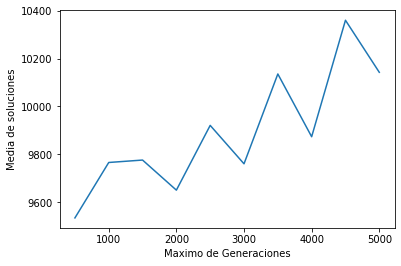

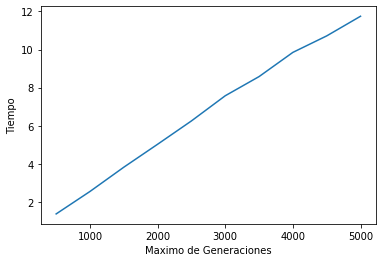

In [ ]:
#codigo cambiando numero de generaciones

def main():


    pesos = generador(100,20,100)
    precios = generador(100,50,500)

    pesoMax = 1000 #Peso máximo que se puede poner en la mochila
    numeroSoluciones = 60 #Tamaño de la poblacion, 45 porque es el mejor resultado obtenido en terminos de eficiencia
    maxGeneraciones = 1000 #Numero de generaciones
    k = 3 #Tamaño torneo selector de padres
    cProb = 0.7 #Probabilidad de cruce
    mProb = 0.1 #Probabilidad de mutacion
    tiempoList = []
    solucionList = [] 

    tam = range(500,5001,500)
    for maxGeneraciones in tam:

      print(maxGeneraciones)

      mediatiempo = 0
      mediasolucion = 0

      numIt=20
      for j in range(0,numIt):

        tini=time.time() #iniciar temporizador
        l=len(pesos)

        ##Creamos n soluciones aleatorias que sean válidas
        poblacion = solucion_inicial(pesoMax,pesos,precios,l,numeroSoluciones)
        #fin generacion aleatoria

        it=1
        while it < maxGeneraciones:
            nSoluciones = aplicarOperadoresGeneticos(poblacion,k,cProb,mProb)
            #Modelo generacional

            
            poblacion = []
            resultados=[]
            best_solucion_por_generacion=[0,0]
            eval = 0

            for solucion in nSoluciones:
                eval=evaluarSolucion(solucion[0],precios,pesos,pesoMax)
            
                if eval > best_solucion_por_generacion[1]:
                  best_solucion_por_generacion[0]=solucion[0]
                  best_solucion_por_generacion[1]=eval
                poblacion.append([solucion[0],eval])
                resultados.append(eval)
            it+=1
            
        tfi=time.time()

        tiempo=tfi-tini

#calcular medias de cada ejecución
        mediatiempo = mediatiempo + tiempo * ((100/numIt)/100)  
        mediasolucion = mediasolucion + best_solucion_por_generacion[1] * ((100/numIt)/100)

#almacenar la media
      tiempoList.append(mediatiempo)
      solucionList.append(mediasolucion)

#generar graficas

    fig, ax = plt.subplots()
    print(solucionList)
    ax.plot(tam,solucionList )
    ax.set_ylabel("Media de soluciones")
    ax.set_xlabel("Maximo de Generaciones")
    plt.show()

    fig, ax = plt.subplots()
    ax.plot(tam, tiempoList )
    ax.set_ylabel("Tiempo")
    ax.set_xlabel("Maximo de Generaciones")
    #plt.show()
    

if __name__ == "__main__":
    main()

Cambiando tamaño del torneo

2
3
4
5
6
7
8
9
10
[[3491.6383333333333, 3873.6274999999996, 4102.028333333334, 4409.705833333332, 4739.816666666667, 5204.0391666666665, 5400.3758333333335, 5768.015833333333, 6030.276666666667, 6453.074166666667, 6629.968333333333, 6927.102500000001, 7111.135, 7356.614999999998, 7462.873333333331, 7725.375, 7568.041666666667, 7592.575, 7532.220833333333, 7843.613333333332, 7873.8724999999995, 7841.303333333332, 8037.884166666665, 8003.3575, 8134.698333333334, 8351.203333333333, 8406.556666666667, 8503.539999999999, 8406.679166666665, 8628.945000000002, 8570.236666666668, 8905.532500000001, 8864.641666666666, 8975.465, 8965.320833333335, 9035.525, 9040.351666666667, 8991.48, 8810.014166666664, 8809.217499999999, 8966.143333333332, 9068.697500000002, 8868.409999999998, 9034.988333333331, 9287.409166666668, 9066.205833333333, 9237.275000000001, 9278.691666666668, 9254.562500000004, 9427.2625, 9414.879166666666, 9435.532500000001, 9314.064999999999, 9647.690833333336, 9649.978333333334, 

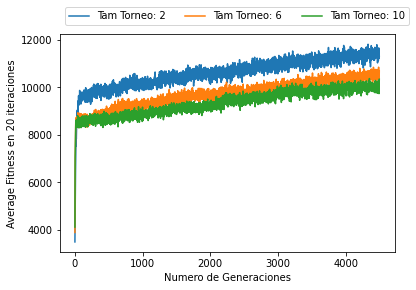

[13455.75, 12611.2, 12183.0, 11820.449999999999, 12095.749999999998, 12080.300000000001, 11848.150000000001, 11442.900000000001, 11584.349999999999]


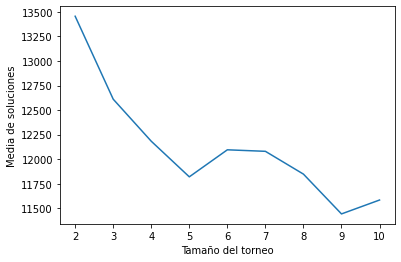

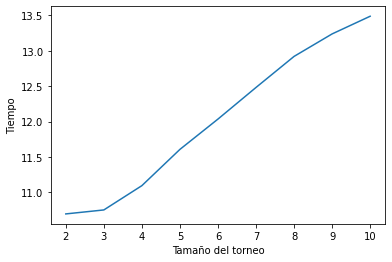

In [ ]:
#codigo cambiando el tamaño del torneo

def main():


    pesos = generador(100,20,100)
    precios = generador(100,50,500)

    pesoMax = 1000 #Peso máximo que se puede poner en la mochila
    numeroSoluciones = 60 #Tamaño de la poblacion, 45 porque es el mejor resultado obtenido en terminos de eficiencia
    maxGeneraciones = 4500 #Numero de generaciones 4500 porque es el mejor resultado obtenido en terminos de eficiencia
    k = 3 #Tamaño torneo selector de padres
    cProb = 0.7 #Probabilidad de cruce
    mProb = 0.1 #Probabilidad de mutacion
    tiempoList = []
    solucionList = [] 
    vectormedias=[]
    tam = range(2,11,1)
    for k in tam:

      print(k)
      mediatiempo = 0
      mediasolucion = 0

      mediasgen=[0]*(maxGeneraciones-1)
      numIt=20
      for j in range(0,numIt):

        tini=time.time() #iniciar temporizador
        l=len(pesos)

        ##Creamos n soluciones aleatorias que sean válidas
        poblacion = solucion_inicial(pesoMax,pesos,precios,l,numeroSoluciones)
        #fin generacion aleatoria

        it=1
        
        while it < maxGeneraciones:
            nSoluciones = aplicarOperadoresGeneticos(poblacion,k,cProb,mProb)
            #Modelo generacional
            
            poblacion = []
            best_solucion_por_generacion=[0,0]
            eval = 0

            for solucion in nSoluciones:
                eval=evaluarSolucion(solucion[0],precios,pesos,pesoMax)

                if eval > best_solucion_por_generacion[1]:
                  best_solucion_por_generacion[0]=solucion[0]
                  best_solucion_por_generacion[1]=eval
                poblacion.append([solucion[0],eval])

            if k % 4 == 2:
              mediasgen[it-1]+=mediaGen(poblacion)
            it+=1

        tfi=time.time()

        tiempo=tfi-tini

#calcular medias de cada ejecución
        mediatiempo = mediatiempo + tiempo * ((100/numIt)/100)      
        mediasolucion = mediasolucion + best_solucion_por_generacion[1] * ((100/numIt)/100)

#almacenar la media
      if k % 4 == 2:
        vectormedias.append(mediasgen)
      tiempoList.append(mediatiempo)
      solucionList.append(mediasolucion)

#generar graficas

    for x in range(len(vectormedias[0])):
      vectormedias[0][x]/=numIt
      vectormedias[1][x]/=numIt
      vectormedias[2][x]/=numIt
    print(vectormedias)
    fig, ax = plt.subplots()

    ax.plot(range(maxGeneraciones-1),vectormedias[0], label="Tam Torneo: 2" )
    ax.plot(range(maxGeneraciones-1),vectormedias[1], label="Tam Torneo: 6" )
    ax.plot(range(maxGeneraciones-1),vectormedias[2], label="Tam Torneo: 10" )
    ejey= "Average Fitness en " + str(numIt) + ' iteraciones'
    ax.set_ylabel(ejey)
    ax.set_xlabel("Numero de Generaciones")
    plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", ncol=3)
    plt.show()

    fig, ax = plt.subplots()
    print(solucionList)
    ax.plot(tam,solucionList )
    ax.set_ylabel("Media de soluciones")
    ax.set_xlabel("Tamaño del torneo")
    plt.show()

    fig, ax = plt.subplots()
    ax.plot(tam, tiempoList )
    ax.set_ylabel("Tiempo")
    ax.set_xlabel("Tamaño del torneo")
    #plt.show()
    

if __name__ == "__main__":
    main()

Cambiando probabilidad de cruce

0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
[[3743.503333333334, 4109.81111111111, 4431.2, 4693.8422222222225, 5150.402222222222, 5391.544444444444, 5718.6577777777775, 6053.4944444444445, 6038.3200000000015, 6259.924444444445, 6249.078888888887, 6109.12111111111, 6258.86, 6521.759999999998, 6677.053333333334, 6755.978888888887, 6903.9477777777765, 7070.286666666667, 7187.407777777777, 7354.7266666666665, 7562.555555555555, 7158.6144444444435, 7321.585555555554, 7359.247777777778, 7252.97111111111, 7484.891111111113, 7335.8311111111125, 7557.584444444445, 7314.974444444444, 7462.697777777777, 7437.66111111111, 7179.092222222222, 7365.0344444444445, 7630.006666666666, 7448.656666666668, 7420.15, 7581.966666666667, 7503.369999999998, 7558.729999999999, 7474.138888888888, 7557.515555555557, 7691.054444444444, 7459.141111111111, 7526.785555555556, 7385.163333333332, 7739.307777777778, 7627.962222222222, 7666.213333333335, 7656.87111111111, 7738.446666666666, 7615.622222222222, 7475.995555555555, 7

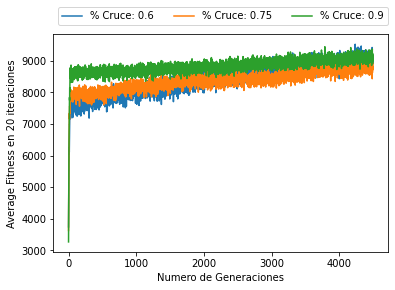

[10700.85, 10553.05, 10234.1, 10113.8, 10147.45, 10007.05, 10347.0, 9882.400000000001]


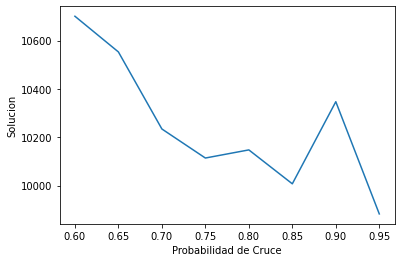

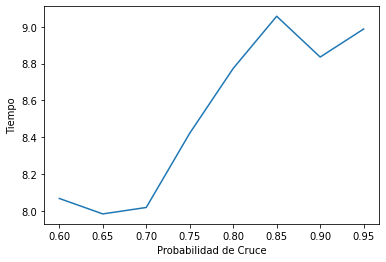

In [ ]:
#codigo cambiando cprob

def main():

    pesos = generador(100,20,100)
    precios = generador(100,50,500)

    pesoMax = 1000 #Peso máximo que se puede poner en la mochila
    numeroSoluciones = 45 #Tamaño de la poblacion, 45 porque es el mejor resultado obtenido en terminos de eficiencia
    maxGeneraciones = 4500 #Numero de generaciones 4500 porque es el mejor resultado obtenido en terminos de eficiencia
    k = 3 #Tamaño torneo selector de padres
    cProb = 0.7 #Probabilidad de cruce
    mProb = 0.1 #Probabilidad de mutacion
    tiempoList = []
    solucionList = [] 
    vectormedias=[]
    cProbs = [0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
    for cProb in cProbs:

      print(cProb)
      #k = 3
      mediatiempo = 0
      mediasolucion = 0

      mediasgen=[0]*(maxGeneraciones-1)
      numIt=20
      for j in range(0,numIt):

        tini=time.time() #iniciar temporizador
        l=len(pesos)

        ##Creamos n soluciones aleatorias que sean válidas
        poblacion = solucion_inicial(pesoMax,pesos,precios,l,numeroSoluciones)
        #fin generacion aleatoria

        it=1
        while it < maxGeneraciones:
            nSoluciones = aplicarOperadoresGeneticos(poblacion,k,cProb,mProb)
            #Modelo generacional
            
            poblacion = []
            best_solucion_por_generacion=[0,0]
            eval = 0

            for solucion in nSoluciones:
                eval=evaluarSolucion(solucion[0],precios,pesos,pesoMax)
            
                if eval > best_solucion_por_generacion[1]:
                  best_solucion_por_generacion[0]=solucion[0]
                  best_solucion_por_generacion[1]=eval
                poblacion.append([solucion[0],eval])
            if cProb==0.6 or cProb==0.75 or cProb==0.9:
              mediasgen[it-1]+=mediaGen(poblacion)
            it+=1
            

        tfi=time.time()

        tiempo=tfi-tini

#calcular medias de cada ejecución
        mediatiempo = mediatiempo + tiempo * ((100/numIt)/100)  
        mediasolucion = mediasolucion + best_solucion_por_generacion[1] * ((100/numIt)/100)

#almacenar la media
      if cProb==0.6 or cProb==0.75 or cProb==0.9:
        vectormedias.append(mediasgen)
      tiempoList.append(mediatiempo)
      solucionList.append(mediasolucion)


#generar graficas

    for x in range(len(vectormedias[0])):
      vectormedias[0][x]/=numIt
      vectormedias[1][x]/=numIt
      vectormedias[2][x]/=numIt
    print(vectormedias)
    fig, ax = plt.subplots()
    
    ax.plot(range(maxGeneraciones-1),vectormedias[0], label="% Cruce: 0.6" )
    ax.plot(range(maxGeneraciones-1),vectormedias[1], label="% Cruce: 0.75" )
    ax.plot(range(maxGeneraciones-1),vectormedias[2], label="% Cruce: 0.9" )
    ejey= "Average Fitness en " + str(numIt) + ' iteraciones'
    ax.set_ylabel(ejey)
    ax.set_xlabel("Numero de Generaciones")
    plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", ncol=3)
    plt.show()

    fig, ax = plt.subplots()
    print(solucionList)
    ax.plot(cProbs,solucionList )
    ax.set_ylabel("Solucion")
    ax.set_xlabel("Probabilidad de Cruce")
    plt.show()

    fig, ax = plt.subplots()
    ax.plot(cProbs, tiempoList )
    ax.set_ylabel("Tiempo")
    ax.set_xlabel("Probabilidad de Cruce")
    #plt.show()
    

if __name__ == "__main__":
    main()

Cambiando probabilidad de mutacion

0.05
0.1
0.15
0.2
0.25
0.3
[[3543.7525, 3696.4800000000005, 4215.35, 4985.634166666668, 5350.535833333333, 5660.64, 5947.285833333332, 6163.568333333334, 6353.975, 6463.2675, 6977.6175, 7151.367500000002, 7411.426666666668, 7399.799166666666, 7500.516666666667, 7686.054999999998, 7939.174166666667, 7993.5824999999995, 7937.7125, 8255.016666666666, 8313.044166666665, 8400.83, 8296.614166666666, 8234.339166666667, 8473.403333333332, 8476.451666666666, 8676.501666666667, 8544.598333333332, 8552.006666666666, 8396.194999999998, 8611.935833333333, 8846.393333333333, 8622.8125, 8767.875833333335, 8915.5425, 8860.234166666665, 8949.009166666667, 8957.03, 8835.891666666665, 9046.294166666667, 8705.307500000003, 8524.637499999999, 8620.794166666668, 8633.904166666667, 8867.091666666667, 8879.381666666666, 8792.220833333335, 8628.047499999999, 8933.126666666667, 8743.670833333334, 8954.399166666666, 8803.028333333332, 8633.531666666666, 8697.503333333334, 8737.311666666666, 8818.174166666666, 87

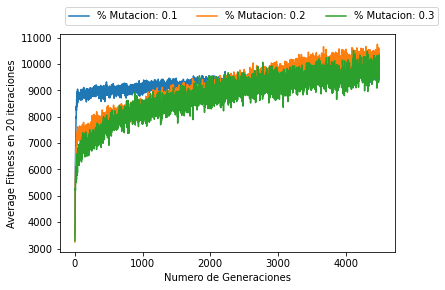

[9845.25, 11076.3, 11865.050000000001, 13543.099999999999, 14933.45, 15879.9]


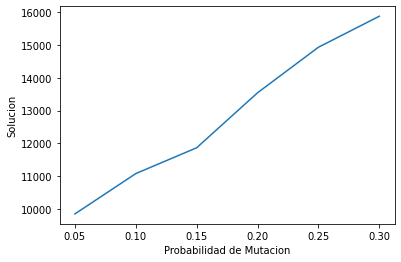

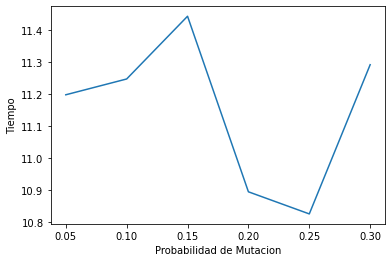

In [ ]:
#codigo cambiando mprob

def main():

    pesos = generador(100,20,100)
    precios = generador(100,50,500)

    pesoMax = 1000 #Peso máximo que se puede poner en la mochila
    numeroSoluciones = 60 #Tamaño de la poblacion, 45 porque es el mejor resultado obtenido en terminos de eficiencia
    maxGeneraciones = 4500 #Numero de generaciones 4500 porque es el mejor resultado obtenido en terminos de eficiencia
    k = 3 #Tamaño torneo selector de padres
    cProb = 0.75 #Probabilidad de cruce
    mProb = 0.1 #Probabilidad de mutacion
    tiempoList = []
    solucionList = [] 
    vectormedias=[]
    mProbs =[0.05,0.1,0.15,0.2,0.25,0.3]
    for mProb in mProbs:

      print(mProb)
      #k = 3
      mediatiempo = 0
      mediasolucion = 0

      mediasgen=[0]*(maxGeneraciones-1)
      numIt=20
      for j in range(0,numIt):

        tini=time.time() #iniciar temporizador
        l=len(pesos)

        ##Creamos n soluciones aleatorias que sean válidas
        poblacion = solucion_inicial(pesoMax,pesos,precios,l,numeroSoluciones)
        #fin generacion aleatoria

        it=1
        while it < maxGeneraciones:
            nSoluciones = aplicarOperadoresGeneticos(poblacion,k,cProb,mProb)
            #Modelo generacional
            
            poblacion = []
            
            best_solucion_por_generacion=[0,0]
            eval = 0

            for solucion in nSoluciones:
                eval=evaluarSolucion(solucion[0],precios,pesos,pesoMax)
            

            
                if eval > best_solucion_por_generacion[1]:
                  best_solucion_por_generacion[0]=solucion[0]
                  best_solucion_por_generacion[1]=eval
                poblacion.append([solucion[0],eval])
                
            if mProb*100 % 2 == 0:
              mediasgen[it-1]+=mediaGen(poblacion)
            it+=1
            

        tfi=time.time()

        tiempo=tfi-tini

#calcular medias de cada ejecución
        mediatiempo = mediatiempo + tiempo * ((100/numIt)/100)
        mediasolucion = mediasolucion + best_solucion_por_generacion[1] * ((100/numIt)/100)

#almacenar la media

      if mProb*100 % 2 == 0:
        vectormedias.append(mediasgen)
      tiempoList.append(mediatiempo)
      solucionList.append(mediasolucion)

#generar graficas

    for x in range(len(vectormedias[0])):
      vectormedias[0][x]/=numIt
      vectormedias[1][x]/=numIt
      vectormedias[2][x]/=numIt
    print(vectormedias)
    fig, ax = plt.subplots()
    #ax.set_title("Numero de Soluciones (Tamaño de la poblacion)")
    ax.plot(range(maxGeneraciones-1),vectormedias[0], label="% Mutacion: 0.1" )
    ax.plot(range(maxGeneraciones-1),vectormedias[1], label="% Mutacion: 0.2" )
    ax.plot(range(maxGeneraciones-1),vectormedias[2], label="% Mutacion: 0.3" )
    ejey= "Average Fitness en " + str(numIt) + ' iteraciones'
    ax.set_ylabel(ejey)
    ax.set_xlabel("Numero de Generaciones")
    plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", ncol=3)
    plt.show()
    
    fig, ax = plt.subplots()
    print(solucionList)
    ax.plot(mProbs,solucionList )
    ax.set_ylabel("Solucion")
    ax.set_xlabel("Probabilidad de Mutacion")
    plt.show()

    fig, ax = plt.subplots()
    ax.plot(mProbs, tiempoList )
    ax.set_ylabel("Tiempo")
    ax.set_xlabel("Probabilidad de Mutacion")
    #plt.show()
    

if __name__ == "__main__":
    main()

Elitismo

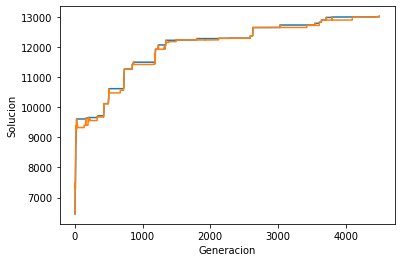

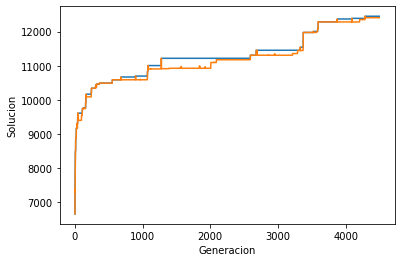

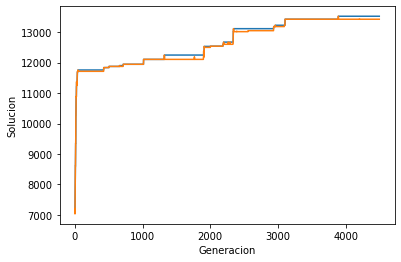

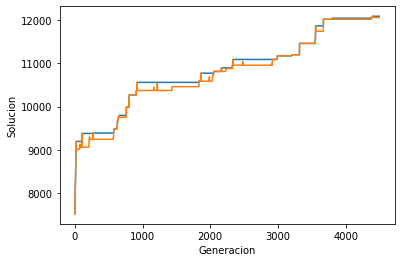

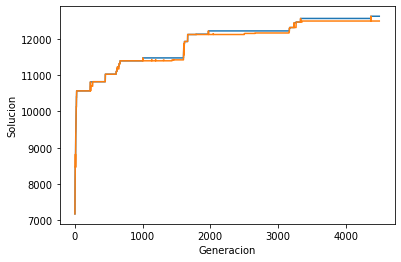

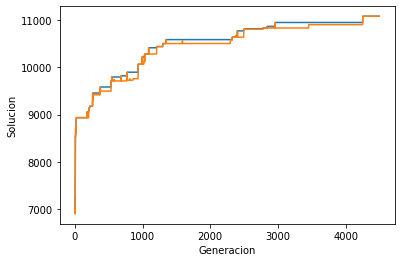

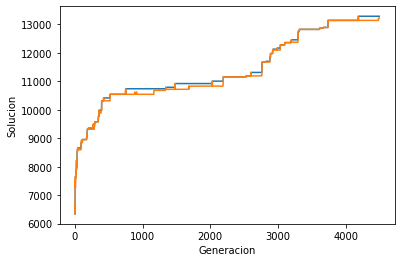

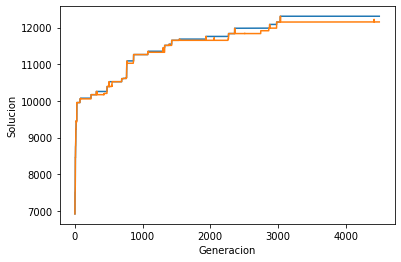

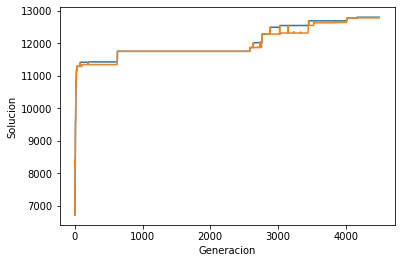

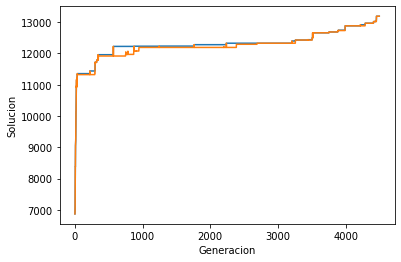

La mejor solucion obtenida es:  [[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 5, 1, 0, 0, 7, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 0], 13185]


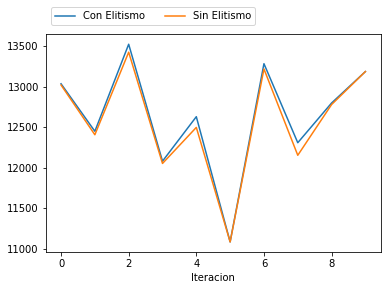

In [ ]:
def main():

    pesos = generador(100,20,100)    
    precios = generador(100,50,500)

    pesoMax = 1000 #Peso máximo que se puede poner en la mochila
    numeroSoluciones = 60 #Tamaño de la poblacion
    maxGeneraciones = 4500#Numero de generaciones
    k = 3 #Tamaño torneo selector de padres
    cProb = 0.75 #Probabilidad de cruce
    mProb = 0.25 #Probabilidad de mutacion
    tiempoList = []
    solucionList = [] 
      
    mediatiempo = 0
    mediasolucion = 0

    conelitismo=[]
    sinelitismo=[]
    its=[0,1,2,3,4,5,6,7,8,9]
    gens=range(maxGeneraciones-1)

    mediasgen=[0]*(maxGeneraciones-1)
    numIt=10
    for j in range(0,numIt):

        tini=time.time()
        l=len(pesos)
        ##Creamos n soluciones aleatorias que sean válidas
        
        bests=[]
        new_best=[]
        
        poblacion=solucion_inicial(pesoMax,pesos,precios,l,numeroSoluciones)

        it=1
        best_solucion=[0,0]
        
        while it < maxGeneraciones:
            nSoluciones = aplicarOperadoresGeneticos(poblacion,k,cProb,mProb)
            #Modelo generacional

            poblacion = []

            best_solucion_por_generacion=[0,0]
            for solucion in nSoluciones:
                eval=evaluarSolucion(solucion[0],precios,pesos,pesoMax)
                if eval > best_solucion[1]:
                  best_solucion[0]=solucion[0]
                  best_solucion[1]=eval
                if eval > best_solucion_por_generacion[1]:
                  best_solucion_por_generacion[0]=solucion[0]
                  best_solucion_por_generacion[1]=eval
                poblacion.append([solucion[0],eval])

            it+=1
            bests.append(best_solucion[1])
            new_best.append(best_solucion_por_generacion[1])

            
            ##Guardar best_solucion[1] para mostrarlo en grafica
        fig, ax = plt.subplots()
    
        ax.plot(gens, bests)
        ax.set_ylabel("Solucion")
        ax.set_xlabel("Iteracion")
        ax.plot(gens,new_best )
            
        ax.set_xlabel("Generacion")
        plt.show()
    

        tfi=time.time()

        tiempo=tfi-tini
        sinelitismo.append(best_solucion_por_generacion[1])
        conelitismo.append(best_solucion[1])

        #print("La poblacion final obtenida es: ",poblacion)
    print("La mejor solucion obtenida es: ",best_solucion)


    
    fig, ax = plt.subplots()
    
    ax.plot(its, conelitismo,label="Con Elitismo")
    ax.set_xlabel("Iteracion")
    #plt.show()

    #fig, ax = plt.subplots()
    ax.plot(its,sinelitismo, label="Sin Elitismo")
    ax.set_xlabel("Iteracion")
    plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", ncol=2)
    #plt.show()
    

if __name__ == "__main__":
    main()

Prueba Grafico Probabilidad Solucion Optima

Numero de Materiales:  10
Soluciones de cada iteracion:  [4020, 4020, 4020, 4186, 4040, 4020, 3638, 3986, 3829, 3638, 3447, 4040, 4020, 3829, 3829, 3447, 3760, 3638, 4020, 3804, 4020, 4020, 3638, 4020, 4020, 4020, 4020, 3683, 4020, 4020, 4040, 3390, 3447, 3829, 4020, 4020, 3703, 4020, 3938, 3638, 3986, 4020, 3447, 3638, 3638, 4020, 4118, 4020, 3829, 3829]


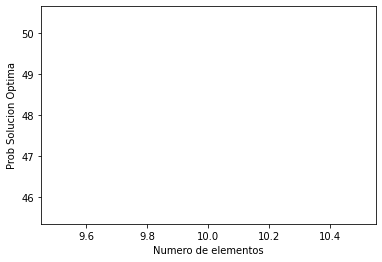

Numero de Materiales:  15
Soluciones de cada iteracion:  [5881, 6611, 6692, 6692, 6298, 6345, 6611, 6530, 6692, 6692, 7422, 6113, 6298, 6692, 5429, 6530, 5881, 6298, 6692, 6376, 6298, 6298, 6692, 5852, 6032, 6611, 6426, 5719, 5852, 5429, 5881, 6692, 6692, 6264, 6801, 5881, 6194, 6426, 6269, 5458, 6496, 6298, 6692, 6298, 6928, 6665, 5987, 6376, 6298, 5429]


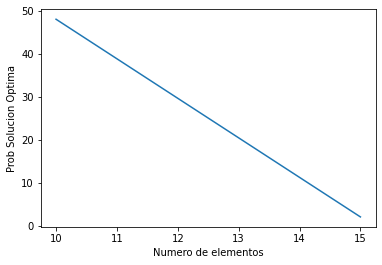

Numero de Materiales:  20
Soluciones de cada iteracion:  [4301, 4056, 3551, 3728, 3973, 4192, 3619, 4165, 3536, 3864, 3728, 3468, 3468, 3750, 3468, 3728, 3468, 3728, 3728, 3468, 3864, 3536, 3619, 3864, 3509, 3973, 3864, 3468, 3291, 3973, 3619, 3400, 3400, 3509, 3755, 3864, 4192, 3468, 3573, 3536, 3864, 3973, 4192, 3619, 4301, 3619, 3400, 3468, 3468, 3728]


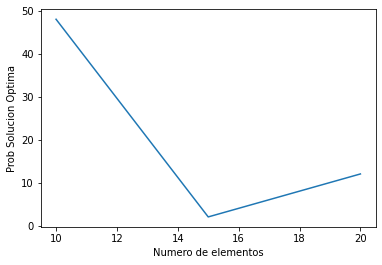

Numero de Materiales:  25
Soluciones de cada iteracion:  [3901, 3856, 4005, 3688, 3931, 3953, 4321, 3770, 3975, 4079, 4226, 4084, 3762, 3807, 3762, 4395, 4071, 3798, 3777, 3615, 4167, 3394, 4071, 4395, 3306, 4152, 3851, 3762, 3556, 3784, 4097, 3559, 3836, 3994, 3387, 4188, 3856, 4446, 3878, 3689, 4152, 3968, 4218, 3453, 3813, 3882, 4085, 4226, 4101, 3777]


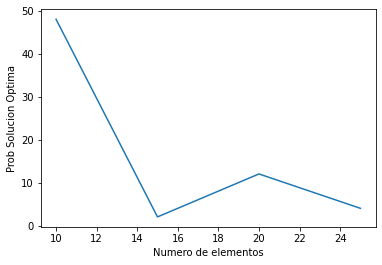

Numero de Materiales:  30
Soluciones de cada iteracion:  [6400, 6359, 5917, 5495, 5752, 6088, 5734, 6417, 6160, 5673, 6301, 5912, 5912, 5752, 6533, 6147, 6068, 5691, 6316, 6160, 5991, 6293, 6059, 5698, 6165, 6151, 5669, 6528, 6334, 6097, 5590, 6062, 5756, 6169, 6160, 6160, 6147, 6111, 5753, 5847, 6404, 5991, 5843, 6413, 5908, 6396, 6533, 6073, 6169, 5308]


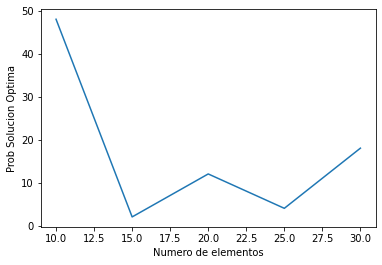

Numero de Materiales:  35
Soluciones de cada iteracion:  [6173, 6230, 6317, 5879, 6277, 6281, 6063, 6379, 6376, 5987, 6277, 6177, 6568, 6275, 6475, 6374, 6179, 6173, 6279, 6276, 6273, 5886, 5982, 6025, 6392, 6121, 5885, 5578, 6565, 6713, 6528, 6419, 5831, 6377, 6125, 6084, 6047, 6126, 6667, 6222, 6413, 6227, 6035, 5950, 6127, 6172, 6170, 5845, 6667, 6170]


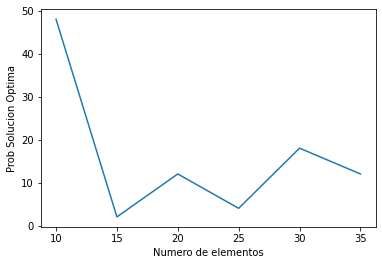

Numero de Materiales:  40
Soluciones de cada iteracion:  [4670, 3777, 4308, 4537, 4414, 3993, 4005, 4321, 4418, 4550, 3972, 4425, 4212, 4534, 4223, 4189, 4271, 4146, 3370, 3991, 3834, 3978, 4455, 4095, 4580, 4260, 4480, 4512, 4454, 4133, 4472, 4133, 4150, 4381, 4295, 4330, 4446, 4160, 4096, 4599, 4478, 4640, 4402, 3747, 3856, 4386, 4502, 4142, 4000, 4072]


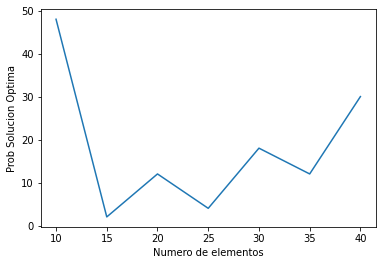

Numero de Materiales:  45
Soluciones de cada iteracion:  [5404, 6185, 5251, 5113, 5635, 5875, 5900, 6042, 5419, 5590, 6185, 6294, 5540, 6179, 5253, 5606, 6179, 5297, 6593, 5432, 5355, 4889, 5496, 6282, 5640, 5363, 4801, 5575, 5340, 4736, 5670, 5444, 6352, 5057, 5914, 6313, 5674, 5987, 5019, 4908, 4087, 4006, 4258, 6140, 6698, 5812, 5482, 5735, 5950, 6195]


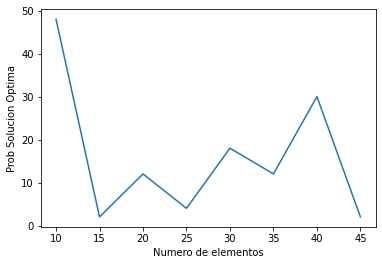

Numero de Materiales:  50
Soluciones de cada iteracion:  [4607, 4690, 4772, 5936, 5345, 4707, 4635, 5244, 4058, 5406, 5297, 5168, 5344, 5158, 4548, 5322, 5200, 5024, 4809, 5043, 4644, 4913, 4722, 5269, 4541, 5609, 5578, 4938, 4705, 4857, 4777, 4836, 5273, 5274, 4859, 5658, 5972, 5141, 4484, 5041, 5222, 5111, 4999, 5379, 4133, 5325, 4437, 4835, 4554, 5446]


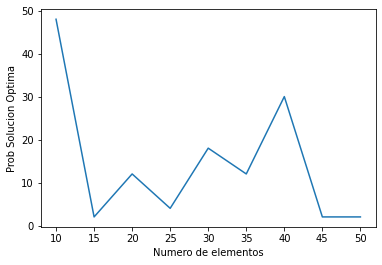

Numero de Materiales:  55
Soluciones de cada iteracion:  [6221, 5681, 6427, 5894, 6116, 7281, 6210, 7250, 6766, 6337, 6088, 6421, 6422, 6016, 7115, 6173, 6443, 6313, 6480, 6543, 6729, 6584, 5968, 6958, 6984, 6544, 6423, 6139, 6360, 6611, 5750, 7224, 6361, 6641, 6204, 6582, 6853, 7151, 6639, 6075, 5941, 6608, 6842, 6040, 7216, 6320, 7525, 6342, 6678, 6712]


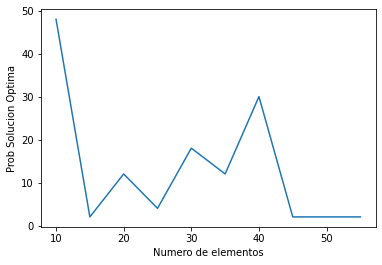

Numero de Materiales:  60
Soluciones de cada iteracion:  [5035, 4137, 5316, 5118, 4921, 4509, 4667, 4770, 5074, 4451, 4901, 4490, 4838, 4669, 4617, 4373, 5204, 4844, 5080, 5066, 5170, 5407, 4627, 5294, 4917, 4537, 4987, 4762, 5214, 5104, 4852, 4735, 4462, 5150, 4837, 4793, 4688, 4752, 4790, 4868, 4906, 4713, 5241, 5019, 4661, 4880, 5330, 5177, 4260, 4997]


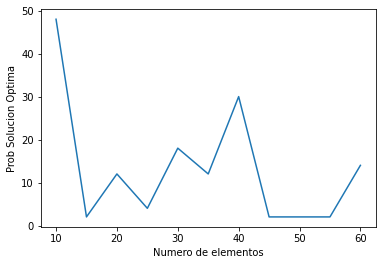

Numero de Materiales:  65
Soluciones de cada iteracion:  [4163, 4383, 3487, 4630, 4294, 4592, 4018, 4267, 3930, 4418, 4455, 4446, 4257, 4233, 4034, 3935, 4157, 4687, 4397, 4150, 4362, 4462, 4157, 4571, 4197, 4715, 4169, 4286, 4355, 4263, 4238, 4458, 4626, 4270, 4473, 4530, 4293, 4424, 4137, 4209, 4678, 4241, 4326, 4317, 4125, 4132, 4466, 4279, 4120, 4038]


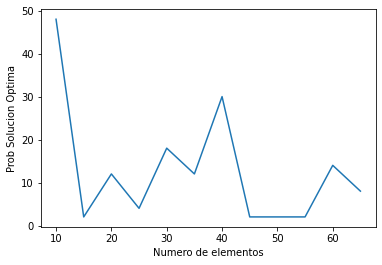

Numero de Materiales:  70
Soluciones de cada iteracion:  [5203, 5332, 4381, 4309, 4783, 5426, 5553, 4781, 4657, 5471, 5364, 5552, 5469, 4291, 5594, 5918, 4780, 4978, 5485, 5939, 5185, 5553, 5190, 5146, 4924, 5421, 5115, 5344, 5164, 5418, 4964, 5401, 4929, 5353, 5108, 5608, 5406, 5185, 5401, 4955, 5330, 4375, 5259, 4904, 5073, 4228, 5766, 5316, 5551, 5161]


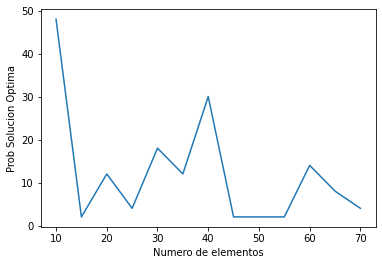

Numero de Materiales:  75
Soluciones de cada iteracion:  [5272, 5868, 5692, 5391, 4926, 5434, 5203, 5262, 4613, 4192, 5236, 4832, 5565, 5082, 5764, 5095, 4392, 5437, 5291, 5313, 4537, 4759, 5107, 5194, 5388, 3917, 4328, 5404, 4768, 4538, 4411, 5425, 5121, 4952, 4882, 4689, 4683, 4422, 5351, 5255, 5017, 4738, 4738, 5292, 4505, 5104, 4392, 5893, 5354, 4759]


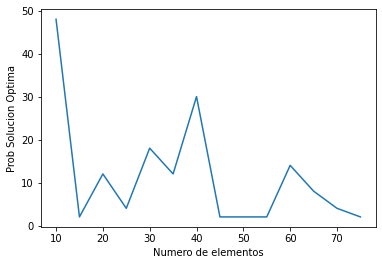

Numero de Materiales:  80
Soluciones de cada iteracion:  [5972, 6171, 6152, 6175, 5932, 6071, 6282, 6029, 6094, 5365, 5799, 5807, 5624, 6780, 6019, 5755, 6825, 6019, 6210, 5699, 5691, 6244, 6504, 5776, 5746, 5649, 5800, 6354, 7186, 5284, 6926, 6120, 5330, 6737, 5869, 6410, 6279, 6711, 6037, 6261, 6561, 5775, 6432, 6616, 5824, 5715, 5904, 5320, 6138, 6058]


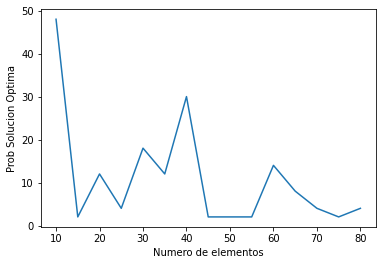

Numero de Materiales:  85
Soluciones de cada iteracion:  [5257, 4858, 6143, 5790, 4712, 6049, 5247, 4809, 5844, 4727, 5720, 5209, 5025, 4971, 5891, 5278, 5029, 4944, 5665, 5225, 4728, 4832, 5202, 4831, 5264, 4559, 4863, 5094, 5508, 5659, 5264, 5166, 6491, 6319, 5083, 5510, 4859, 4554, 5602, 5442, 4982, 5259, 4814, 4677, 5173, 4943, 4394, 6345, 5696, 5963]


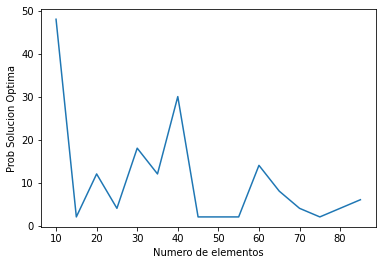

Numero de Materiales:  90
Soluciones de cada iteracion:  [4673, 4855, 4482, 4058, 4326, 4262, 4193, 4652, 4435, 3846, 4371, 4361, 3847, 4404, 3842, 4269, 4224, 4223, 4665, 3710, 3620, 4841, 3825, 3823, 5436, 4515, 4693, 4814, 4333, 4101, 3999, 3878, 4904, 3987, 3988, 4255, 5196, 4721, 4241, 4111, 4629, 4222, 3878, 4420, 4466, 5022, 4167, 4914, 4238, 5001]


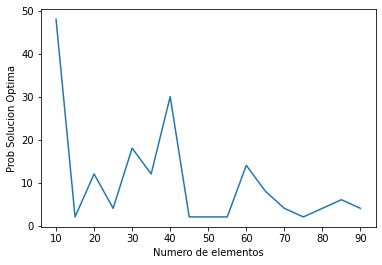

Numero de Materiales:  95
Soluciones de cada iteracion:  [5650, 5371, 6287, 5070, 5819, 5029, 5293, 5079, 6051, 5119, 5835, 4900, 5017, 5627, 4814, 5055, 6032, 5573, 4732, 5981, 5541, 5249, 6078, 5502, 5273, 4726, 4790, 6037, 4681, 5162, 5856, 5880, 4825, 4703, 5556, 5270, 6328, 4646, 4914, 5496, 5442, 5333, 5229, 5598, 5427, 5757, 5914, 4896, 6212, 6048]


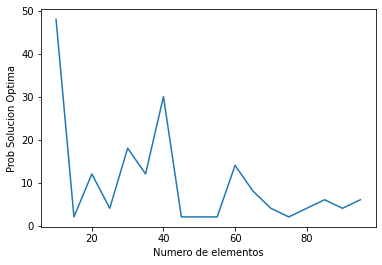

Numero de Materiales:  100
Soluciones de cada iteracion:  [5303, 5578, 5441, 6279, 4716, 5335, 5115, 5453, 5497, 5100, 5127, 4812, 6025, 5180, 6002, 5625, 5576, 6151, 5227, 5138, 5149, 4882, 5873, 5172, 5711, 5361, 5971, 5746, 5728, 5580, 6180, 5647, 6177, 5453, 5280, 5009, 4915, 4915, 5246, 5069, 5318, 5232, 5598, 5025, 5922, 5600, 5401, 5359, 5972, 5352]


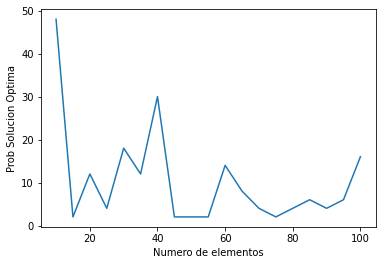

In [ ]:
#codigo cambiando numero de materiales

def main():
    probList=[]
    for numMateriales in range(10,101,5):
      print("Numero de Materiales: ", numMateriales)
      pesos = generador(numMateriales,50,200)
      precios = generador(numMateriales,50,500)

      pesoMax = 1000 #Peso máximo que se puede poner en la mochila
      numeroSoluciones = 40 #Tamaño de la poblacion
      maxGeneraciones =4500 #Numero de generaciones ----------
      k = 3 #Tamaño torneo selector de padres
      cProb = 0.75 #Probabilidad de cruce
      mProb = 0.25 #Probabilidad de mutacion
      iteraciones = []
      solucionList = [] 
      numIt=50
      for i in range(numIt):
        
        tini=time.time() #iniciar temporizador
        l=len(pesos)

        ##Creamos n soluciones aleatorias que sean válidas
        poblacion = solucion_inicial(pesoMax,pesos,precios,l,numeroSoluciones)
        #fin generacion aleatoria

        it=1

        while it < maxGeneraciones:
                nSoluciones = aplicarOperadoresGeneticos(poblacion,k,cProb,mProb)
                #Modelo generacional
                
                poblacion = []
                resultados=[]
                best_solucion_por_generacion=[0,0]
                
                for solucion in nSoluciones:
                    eval=evaluarSolucion(solucion[0],precios,pesos,pesoMax)
                
                    if eval > best_solucion_por_generacion[1]:
                      best_solucion_por_generacion[0]=solucion[0]
                      best_solucion_por_generacion[1]=eval
                
                    poblacion.append([solucion[0],eval])
                    resultados.append(eval)
                
                iteraciones.append(it)

                it+=1

        tfi=time.time()

        tiempo=tfi-tini
        solucionList.append(best_solucion_por_generacion[1])
      best_solucion=0
      prob=0
      print("Soluciones de cada iteracion: ",solucionList)
      for x in solucionList:
        if x > best_solucion:
          best_solucion=x
          prob=1
          continue
        if x == best_solucion or abs(x-best_solucion)<best_solucion*0.05:
          prob+=1
      probList.append(prob*(100/numIt))
      fig, ax = plt.subplots()
      #print(solucionList)
      ax.plot(range(10,numMateriales+1,5),probList )
      ax.set_ylabel("Prob Solucion Optima")
      ax.set_xlabel("Numero de elementos")
      
      plt.show()

  #generar graficas
      

if __name__ == "__main__":
    main()

Poblacion Inicial Sin Restricciones

Iteracion:  0
Iteracion:  1
Iteracion:  2
Iteracion:  3
Iteracion:  4
Iteracion:  5
Iteracion:  6
Iteracion:  7
Iteracion:  8
Iteracion:  9


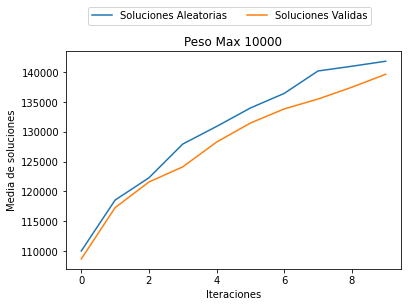

In [16]:
def main():

    pesos = generador(100,20,100)
    precios = generador(100,50,500)

    pesoMax = 10000 
    numeroSoluciones = 60 
    maxGeneraciones = 4500 
    k = 3 
    cProb = 0.75 
    mProb = 0.25
    tiempoList = []
    solucionList = [] 
      
    mediatiempo = 0
    mediasolucion = 0

    poblacionNoValida = []
    l=len(pesos)
    for n in range(numeroSoluciones):
      individuo = generador(len(pesos),0,3)
      poblacionNoValida.append([individuo, evaluarSolucion(individuo,precios,pesos,pesoMax)])
    poblacionValida=solucion_inicial(pesoMax,pesos,precios,l,numeroSoluciones)
    solucionListValida=[]
    solucionListNoValida=[]
    for j in range(0,10):
        print("Iteracion: ",j)

        tini=time.time() 
        
          #fin generacion aleatoria

        it=1
          
        while it < maxGeneraciones:
            nSoluciones = aplicarOperadoresGeneticos(poblacionValida,k,cProb,mProb)
            nSoluciones2 = aplicarOperadoresGeneticos(poblacionNoValida,k,cProb,mProb)
                #Modelo generacional
            poblacionValida = []
            poblacionNoValida = []
            best_solucion_por_generacion_valida=[0,0]
            
            for solucion in nSoluciones:
                eval=evaluarSolucion(solucion[0],precios,pesos,pesoMax)
                
                if eval > best_solucion_por_generacion_valida[1]:
                  best_solucion_por_generacion_valida[0]=solucion[0]
                  best_solucion_por_generacion_valida[1]=eval
                poblacionValida.append([solucion[0],eval])
                
            best_solucion_por_generacion_no_valida=[0,0]
            for solucion in nSoluciones2:
                eval=evaluarSolucion(solucion[0],precios,pesos,pesoMax)
                
                if eval > best_solucion_por_generacion_no_valida[1]:
                  best_solucion_por_generacion_no_valida[0]=solucion[0]
                  best_solucion_por_generacion_no_valida[1]=eval
                poblacionNoValida.append([solucion[0],eval])

            it+=1
                

    #calcular medias de cada ejecución
        
        solucionListValida.append(best_solucion_por_generacion_valida[1])
        solucionListNoValida.append(best_solucion_por_generacion_no_valida[1])

   #generar graficas
        
    fig, ax = plt.subplots()
    ax.plot(range(0,10,1),solucionListNoValida,label="Soluciones Aleatorias" )
    ax.set_ylabel("Media de soluciones")
    ax.set_xlabel("Iteraciones")
    ax.set_title("Peso Max 10000")

    
    ax.plot(range(0,10,1), solucionListValida, label = "Soluciones Validas" )
    plt.legend(bbox_to_anchor=(0.05,1.1,1,0.2), loc="lower left", ncol=2)
    plt.show()


if __name__ == "__main__":
    main()